In [1]:
import dtale
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


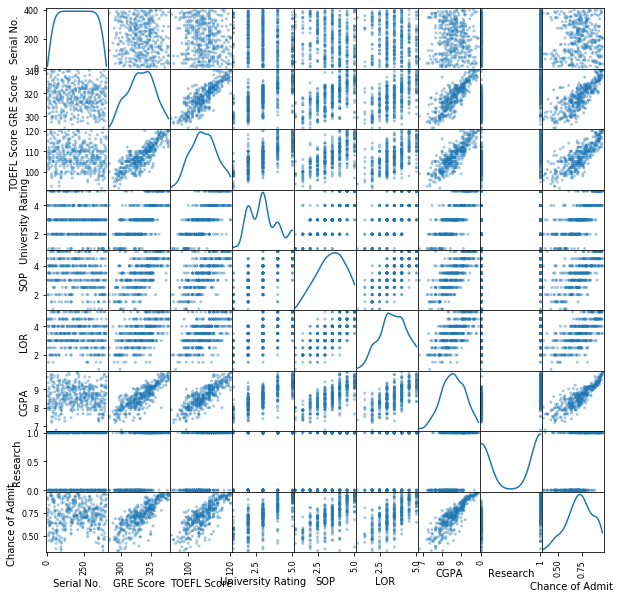

In [3]:
sm = scatter_matrix(df, alpha=0.4, figsize=(10, 10), diagonal='kde')

In [4]:
df = df[df['LOR '] > 1]
df = df[df['CGPA'] > 6.80]
df = df[df['Chance of Admit '] > 0.34]
df = df.drop('Serial No.',1)

In [5]:
#llamado a D-Tale para hacer el analisis.
#dtale.show(df)

In [6]:
#separo la variable objectivo y lo convierto en un valor discreto
df['Chance of Admit '] = np.where(df['Chance of Admit '] >= 0.6, True, False)
le = LabelEncoder()
le.fit(df['Chance of Admit '].values)
target = le.transform(df['Chance of Admit '].values)
values = df.drop('Chance of Admit ', axis=1).values

In [7]:
# Mejoras
values = df.drop('University Rating', axis=1).values

In [8]:
#creo los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(values,target, random_state=0)

In [9]:
#se crea un arbol de desicion
clf = DecisionTreeClassifier(max_depth = 6,random_state = 0)

In [10]:
#se entrena el clasificador
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

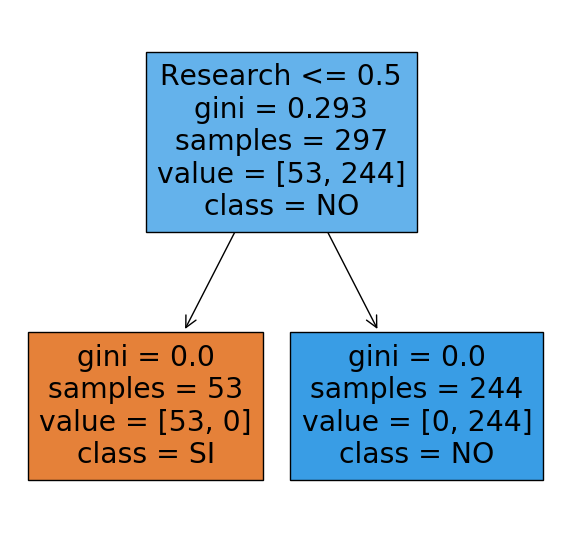

In [50]:
fn=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']
cn=['SI', 'NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=100)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [12]:
#predecir con datos de prueba
Y_pred = clf.predict(X_test)

In [15]:
#Matrix de confunsión
print(metrics.confusion_matrix(Y_test, Y_pred))

[[16  0]
 [ 0 83]]


In [16]:
#Reporte de clasificación
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        83

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [24]:
#MLP
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [25]:
#normalizar datos
scaler = StandardScaler()
scaler.fit(X_train)
Mlp_train = scaler.transform(X_train)
Mlp_test = scaler.transform(X_test)

In [44]:
#configurar
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5),max_iter=500)

In [45]:
#entrenar
mlp.fit(Mlp_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [46]:
#Predecir
Mlp_pred = mlp.predict(Mlp_test)

In [48]:
#Matrix de confunsión
print(metrics.confusion_matrix(Y_test, Mlp_pred))

[[16  0]
 [ 0 83]]


In [49]:
#Reporte de clasificación
print(classification_report(Y_test,Mlp_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        83

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

